<center>
<font size='7' style="color:#0D47A1">  <b>Self organizing maps (SOM)</b> </font>
</center>

<hr style= "height:3px;">
<br> 

<br>
<br>
<br>
<font size='6' style="color:#00A6D6">  <b>Introduction</b> </font>

How to order this color mesh automatically?

![SOM 1](SOM1.png)

Self-organizing maps is a discretized representation of the multidimensional input space of the training samples in a 2D map of nodes and is therefore a method to do dimensionality reduction. One application of SOM is about poverty information in the world. http://neupy.com/2017/12/09/sofm_applications.html

![SOM 2](SOM2.png)

In this kind of artificial neuronal network, there are no hidden layers, only the input and output layers. The map space is defined beforehand, usually as a finite two-dimensional region where nodes are arranged in a regular hexagonal or rectangular grid. There are no lateral connections between nodes within the lattice.

Each node has a specific topological position (an x, y coordinate in the lattice) and contains a vector of weights of the same dimension as the input vectors. The scheme of SOM is:

![SOM 3](SOM3.png)

<br>
<br>
<br>
<font size='6' style="color:#00A6D6">  <b>Algorithm</b> </font>

* Initialize each node’s weights randomly
* Choose a random vector from training data and present it to the SOM
* Calculate the distance between the input vector and the weights of each node, according to 

\begin{equation*}
D = \sqrt {\sum_{i=1}^n{(x_i-W_i)}^2} 
\end{equation*}

Compare the distances among all nodes, the lowest value distance is defined as the Best Matching Unit (BMU).

* Calculate the neighborhood radius around BMU by 

\begin{equation*}
\sigma (t) = \sigma_0 \exp \left(\frac {-t}{\lambda}\right) 
\end{equation*}

\begin{equation*}
\lambda = \frac {n}{ln \sigma_0} 
\end{equation*}

Where $\sigma$ $(t)$ is the radius of neighborhood at step $t$, $t$ is the iteration step, $\sigma_0$ is the initial radius of the complete array nodes, $\lambda$ is a normalization factor, and $n$ is total number of iterations. 

![SOM 4](SOM4.png)

In each iteration the neighborhood changes of size.

![SOM 5a](SOM5a.png)

* Change the weights of each node in the BMU’s neighborhood in order to become more like the BMU. Nodes closest to the BMU are altered more than the nodes furthest away in  the neighborhood according to

\begin{equation*}
 W (t+1) =  W(t) + \Theta(t) L(t) \left ( x - W(t) \right) 
\end{equation*}

\begin{equation*}
L(t) = L_0 \exp \left ( \frac{-t}{\lambda} \right)
\end{equation*}

\begin{equation*}
\Theta (t) = \exp \Biggl( \frac{-d^2}{2 \sigma^2(t)} \Biggr)  
\end{equation*}

Where $W(t+1)$  is a new weight, $W(t)$ the old weight, $L_0$ is called learning factor, $d$ is the distance between a neighbor node and BMU, and $\Theta$ is a factor that takes into account the neighborhood.

* Repeat steps for all vectors over enough iterations for convergence

The node obtains a color according to with the factor $D$ and the chosen vector. If a node is close to a BMU it is similar but it is far away, then it is different.  

![SOM6a](SOM6a.png)

![SOM6b](SOM6b.png)

There are some details that are from the criteria as well as how many neurons to use?, which is the value of learning rate $L_0$? and how many iterations $n$ are needed.

<br>
<br>
<br>
<font size='6' style="color:#00A6D6">  <b>Strengths/Weaknesses</b> </font>

<br>
<br>
<br>
<font size='6' style="color:#00A6D6">  <b>Summary</b> </font>

<br>
<br>
<br>
<font size='6' style="color:#00A6D6">  <b>Example</b> </font>

Nice 3D representations of SOM are in:

https://demogng.de/js/demogng.html?model=SOM 

In [17]:
import numpy as np
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
import cmath
from copy import copy
class node():
    def __init__(self,x,y,v):
        self.c = x+y*1j
        self.v = v



def mandelbrot( h,w, maxit=500 ):
    """Returns an image of the Mandelbrot fractal of size (h,w)."""
    y,x = np.ogrid[ -1.5:1.5:h*1j, -2:1:w*1j ]
    c = x+y*1j
    z = c
    divtime = maxit + np.zeros(z.shape, dtype=int)

    for i in tqdm_notebook(range(maxit)):
        z = z**2 + c
        diverge = z*np.conj(z) > 2**2            # who is diverging
        div_now = diverge & (divtime==maxit)  # who is diverging now
        divtime[div_now] = i                  # note when
        z[diverge] = 2                        # avoid diverging too much

    return divtime


Mandel = mandelbrot(500,500)
plt.imshow(Mandel)
plt.show()

nodes = np.zeros((6,6),dtype=object)

for x_values in range(2,8):
    for y_values in range(2,8):
        nodes[x_values-2][y_values-2]=node(50*x_values,50*y_values,Mandel[50*x_values,50*y_values])
        
fig = plt.figure()

ax = fig.add_axes([0., 0., 1., 1., ])
# Hide grid lines
ax.grid(False)
ax.axis('off')
# Hide axes ticks

plt.imshow(Mandel)

copyNodes = np.ravel(nodes)
for mark in tqdm_notebook(copyNodes):
    plt.scatter(mark.c.real, mark.c.imag, s=5, c='red', marker='o')

plt.show()


def distance(z,w):
    return (z[0]-w[0])**2+(z[1]-w[1])**2
def findNbh(indexX,indexY,nodes):
    copyNodes=np.ravel(nodes)
    OrderedCopyNodes = sorted(copyNodes, key=lambda item: abs(item.c- nodes[indexX][indexY].c))
    return OrderedCopyNodes[:5]
def findBMU(indexX,indexY,nodes):
    copyNodes=np.ravel(nodes)
    OrderedCopyNodes = sorted(copyNodes, key=lambda item: abs(item.v- nodes[indexX][indexY].v))
    return OrderedCopyNodes[:5][1]
def limits(z):
    if z.real>499:
        valReal = 499
    elif z.real<0:
        valReal = 0
    else:
        valReal = z.real
    if z.imag>499:
        valImag = 499
    elif z.imag<0:
        valImag = 0
    else:
        valImag = z.imag
    return valReal+valImag*1j


numberOfIterations = 5

for iteration in tqdm_notebook(range(numberOfIterations)):
    for x_values in range(0,6):
        for y_values in range(0,6):
            BMUc = findBMU(x_values,y_values,nodes).c
            for nearNodes in findNbh(x_values,y_values,nodes):
                nearNodes.c  = limits(nearNodes.c + .03*2**(-iteration/20)*BMUc)
                nearNodes.v = Mandel[int(nearNodes.c.real)%500, int(nearNodes.c.imag)%500]
    Julia2 = copy(Mandel)
    fig = plt.figure()

    ax = fig.add_axes([0., 0., 1., 1., ])
    # Hide grid lines
    ax.grid(False)
    ax.axis('off')
    # Hide axes ticks

    plt.imshow(Julia2)

    copyNodes = np.ravel(nodes)
    for mark in copyNodes:
        plt.scatter(mark.c.real, mark.c.imag, s=5, c='red', marker='o')
    plt.show()

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

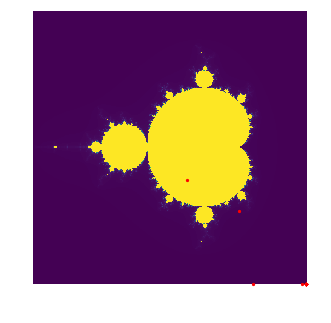

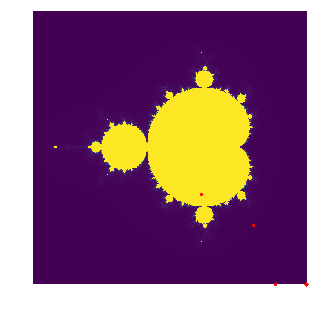

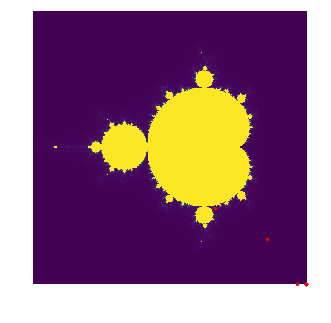

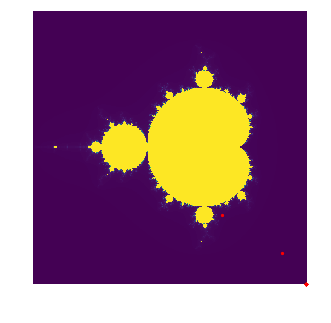

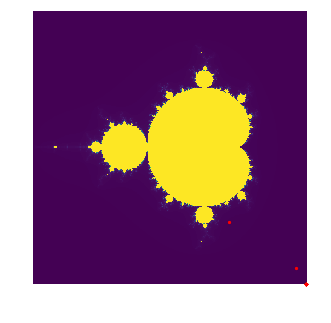

In [21]:

for iteration in tqdm_notebook(range(numberOfIterations)):
    for x_values in range(0,6):
        for y_values in range(0,6):
            BMUc = findBMU(x_values,y_values,nodes).c
            for nearNodes in findNbh(x_values,y_values,nodes):
                nearNodes.c  = limits(nearNodes.c + .03*2**(-iteration/20)*BMUc)
                nearNodes.v = Mandel[int(nearNodes.c.real)%500, int(nearNodes.c.imag)%500]
    fig = plt.figure()

    ax = fig.add_axes([0., 0., 1., 1., ])
    # Hide grid lines
    ax.grid(False)
    ax.axis('off')
    # Hide axes ticks

    plt.imshow(Mandel)

    copyNodes = np.ravel(nodes)
    for mark in copyNodes:
        plt.scatter(mark.c.real, mark.c.imag, s=5, c='red', marker='o')
    plt.show()

In [20]:
import matplotlib
matplotlib.get_backend()

'module://ipykernel.pylab.backend_inline'

In [14]:
import numpy as np

raw_data = np.random.randint(0, 255, (3, 100)) #array of 100 vectors with 3D coordinates
# which values goesto 0 and 255

network_dimensions = np.array([5, 5])
n_iterations = 2000
init_learning_rate = 0.01
  # establish size variables based on data
m = raw_data.shape[0]
n = raw_data.shape[1]

  # weight matrix (i.e. the SOM) needs to be one m-dimensional vector for each neuron in the SOM
net = np.random.random((network_dimensions[0], network_dimensions[1], m))

  # initial neighbourhood radius
init_radius = max(network_dimensions[0], network_dimensions[1]) / 2
  # radius decay parameter
time_constant = n_iterations / np.log(init_radius)

normalise_data = True
# if True, assume all data is on common scale
# if False, normalise to [0 1] range along each column
normalise_by_column = False

# we want to keep a copy of the raw data for later
data = raw_data

# check if data needs to be normalised
if normalise_data:
    if normalise_by_column:
        # normalise along each column
        col_maxes = raw_data.max(axis=0)
        data = raw_data / col_maxes[np.newaxis, :]
    else:
        # normalise entire dataset
        data = raw_data / data.max()
# select a trainig example at random
t = data[:, np.random.randint(0, n)].reshape(np.array([m, 1]))


In [15]:
def find_bmu(t, net, m):
    """
        Find the best matching unit for a given vector, t, in the SOM
        Returns: a (bmu, bmu_idx) tuple where bmu is the high-dimensional BMU
                 and bmu_idx is the index of this vector in the SOM
    """
    bmu_idx = np.array([0, 0])
    # set the initial minimum distance to a huge number
    min_dist = np.iinfo(np.int).max
    # calculate the high-dimensional distance between each neuron and the input
    for x in range(net.shape[0]):
        for y in range(net.shape[1]):
            w = net[x, y, :].reshape(m, 1)
            # don't bother with actual Euclidean distance, to avoid expensive sqrt operation
            sq_dist = np.sum((w - t) ** 2)
            if sq_dist < min_dist:
                min_dist = sq_dist
                bmu_idx = np.array([x, y])
    # get vector corresponding to bmu_idx
    bmu = net[bmu_idx[0], bmu_idx[1], :].reshape(m, 1)
    # return the (bmu, bmu_idx) tuple
    return (bmu, bmu_idx)

# find its Best Matching Unit
bmu, bmu_idx = find_bmu(t, net, m)
# decay the SOM parameters
def decay_radius(init_radius, i, time_constant):
   return init_radius * np.exp(-i / time_constant)

def decay_learning_rate(initial_learning_rate, i, n_iterations):
   return initial_learning_rate * np.exp(-i / n_iterations)

def calculate_influence(distance, radius):
   return np.exp(-distance / (2* (radius**2)))
 

In [16]:
                
for i in range(n_iterations):
    r = decay_radius(init_radius, i, time_constant)
    l = decay_learning_rate(init_learning_rate, i, n_iterations)

# now we know the BMU, update its weight vector to move closer to input
# and move its neighbours in 2-D space closer
# by a factor proportional to their 2-D distance from the BMU
    for x in range(net.shape[0]):
        for y in range(net.shape[1]):
           w = net[x, y, :].reshape(m, 1)
        # get the 2-D distance (again, not the actual Euclidean distance)
           w_dist = np.sum((np.array([x, y]) - bmu_idx) ** 2)
        # if the distance is within the current neighbourhood radius
        if w_dist <= r:
            # calculate the degree of influence (based on the 2-D distance)
            influence = calculate_influence(w_dist, r)
            # now update the neuron's weight using the formula:
            # new w = old w + (learning rate * influence * delta)
            # where delta = input vector (t) - old w
            new_w = w + (l * influence * (t - w))
            # commit the new weight
            net[x, y, :] = new_w.reshape(1, 3)


At the end the initial color mesh looks as 

![SOM 7](SOM7.png)

<br>
<br>
<br>
<font size='6' style="color:#00A6D6">  <b>References</b> </font>

http://www.ai-junkie.com/ann/som/som1.html (info)

https://www.youtube.com/watch?v=_Euwc9fWBJw (video)

http://neupy.com/2017/12/09/sofm_applications.html (applications)

http://blog.yhat.com/posts/self-organizing-maps-2.html  (python code)

https://demogng.de/js/demogng.html?model=SOM  (demo 3D)





